In [1]:
%matplotlib inline

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import gym
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
time_steps = 1e6 #testrun
#time_steps = 1000000 #for prod or even more *10?100?
time_steps_test = int(time_steps/100)

from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines import PPO2
from stable_baselines import results_plotter
from stable_baselines.sac.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C
from stable_baselines import ACKTR
from stable_baselines import HER
from stable_baselines import SAC

os.makedirs("logs_test", exist_ok=True)
os.makedirs("logs_train", exist_ok=True)
os.makedirs("logs_tmp", exist_ok=True)
from shutil import copyfile
from utils import *

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



## SAC





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Dense instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




time_steps_todo: 1000000.0


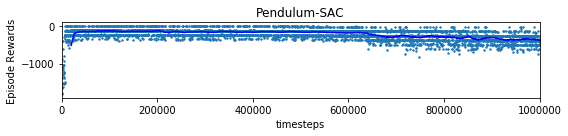

CPU times: user 1h 50min 22s, sys: 14min 26s, total: 2h 4min 49s
Wall time: 1h 19min 7s


In [2]:
%%time
envname="Pendulum-v0"
env = gym.make(envname)
exp_name=env.spec._env_name+'-SAC'

#train
log_dir='logs_train/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = SAC(MlpPolicy, env, verbose=0)

print("time_steps_todo: "+str(time_steps))
model.learn(total_timesteps=int(time_steps))

os.makedirs("models", exist_ok=True)
model.save("models/"+log_dir.split("/")[1])

copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


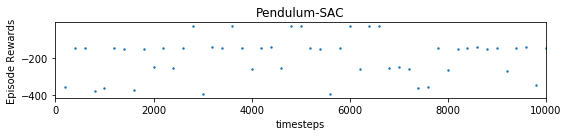

CPU times: user 9.54 s, sys: 794 ms, total: 10.3 s
Wall time: 10.2 s


In [3]:
%%time
#test

env = gym.make(envname)
log_dir='logs_test/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = SAC.load("models/"+log_dir.split("/")[1])
obs = env.reset()
for i in range(time_steps_test):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    #env.render()
    
copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


In [4]:
#Error: the action space low and high must be symmetric

time_steps_todo: 1000000.0


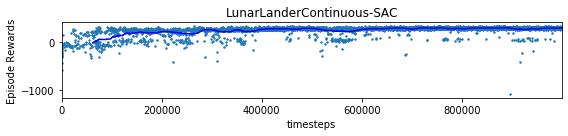

CPU times: user 2h 34min 51s, sys: 18min 33s, total: 2h 53min 24s
Wall time: 2h 1min 22s


In [5]:
%%time
envname="LunarLanderContinuous-v2"
env = gym.make(envname)
exp_name=env.spec._env_name+'-SAC'

#train
log_dir='logs_train/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = SAC(MlpPolicy, env, verbose=0)

print("time_steps_todo: "+str(time_steps))
model.learn(total_timesteps=int(time_steps))

os.makedirs("models", exist_ok=True)
model.save("models/"+log_dir.split("/")[1])

copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


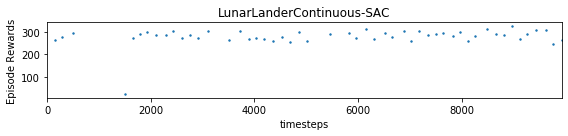

CPU times: user 23.6 s, sys: 944 ms, total: 24.5 s
Wall time: 25.9 s


In [6]:
%%time
#test

env = gym.make(envname)
log_dir='logs_test/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = SAC.load("models/"+log_dir.split("/")[1])
obs = env.reset()
for i in range(time_steps_test):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    #env.render()
    
copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


time_steps_todo: 1000000.0


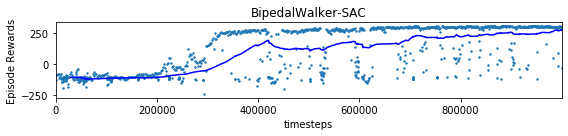

CPU times: user 2h 16min 40s, sys: 17min 54s, total: 2h 34min 34s
Wall time: 1h 40min 21s


In [7]:
%%time
envname="BipedalWalker-v2"
env = gym.make(envname)
exp_name=env.spec._env_name+'-SAC'

#train
log_dir='logs_train/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = SAC(MlpPolicy, env, verbose=0)

print("time_steps_todo: "+str(time_steps))
model.learn(total_timesteps=int(time_steps))

os.makedirs("models", exist_ok=True)
model.save("models/"+log_dir.split("/")[1])

copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


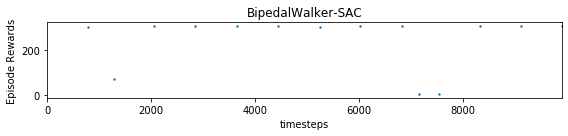

CPU times: user 13.1 s, sys: 904 ms, total: 14 s
Wall time: 14.4 s


In [8]:
%%time
#test

env = gym.make(envname)
log_dir='logs_test/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = SAC.load("models/"+log_dir.split("/")[1])
obs = env.reset()
for i in range(time_steps_test):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    #env.render()
    
copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()
